In [1]:
import sys
import os
import findspark
findspark.init()

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
import spark
import pyspark

In [3]:
from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.functions import *

In [13]:
import mysql.connector as mariadb
from mysql.connector import Error
import numpy as np
import pandas as pd
from getpass import getpass
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [29]:
# get the database username and password from secret.txt
secrets_file = os.path.join("files", "secret.txt")
with open(secrets_file, "r") as f:
    lines = f.readlines()
    for line in lines:
        words = line.split("=")
        if (words[0] == "user"):
            user = words[1].strip()
        elif (words[0] == "password"):
            password = words[1].strip()
f.close()


In [17]:
%ls files

 Volume in drive C is OS
 Volume Serial Number is 04CD-4FD4

 Directory of C:\Users\bkush\projects\Capstone_Project\files

08/21/2022  10:02 AM    <DIR>          .
08/21/2022  01:25 PM    <DIR>          ..
08/21/2022  09:33 AM            25,315 cdw_sapp_branch.json
08/21/2022  09:33 AM         8,691,794 cdw_sapp_credit.json
08/21/2022  09:33 AM           342,221 cdw_sapp_custmer.json
08/20/2022  02:06 PM           117,454 loan_datafile
08/21/2022  10:22 AM           117,454 loan_datafile.json
08/21/2022  09:14 AM                24 secret.txt
               6 File(s)      9,294,262 bytes
               2 Dir(s)  273,612,910,592 bytes free


In [18]:
spark = SparkSession.builder.appName('req3_data_visual').getOrCreate()

In [19]:
df_cc = spark.read\
     .format("jdbc")\
     .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone")\
     .option("dbtable", "creditcard_capstone.cdw_sapp_credit_card")\
     .option("user", user)\
     .option("password", password)\
     .load()
df_cc.count()

186776

In [20]:
df_branch = spark.read\
     .format("jdbc")\
     .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone")\
     .option("dbtable", "creditcard_capstone.cdw_sapp_branch")\
     .option("user", user)\
     .option("password", password)\
     .load()
df_branch.count()

575

In [21]:
df_customer = spark.read\
     .format("jdbc")\
     .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone")\
     .option("dbtable", "creditcard_capstone.cdw_sapp_customer")\
     .option("user", user)\
     .option("password", password)\
     .load()
df_customer.count()

4760

In [22]:
pd_df_cc = df_cc.toPandas()
pd_df_branch = df_branch.toPandas()
pd_df_customer = df_customer.toPandas()

In [23]:
pd_df_cc.head(1)

,CUST_CC_NO,TIMEID,CUST_SSN,BRANCH_CODE,TRANSACTION_TYPE,TRANSACTION_VALUE,TRANSACTION_ID
0,4210653312478046,20180813,123455692,156,Grocery,91.08,22562


<AxesSubplot:xlabel='TRANSACTION_TYPE', ylabel='count'>

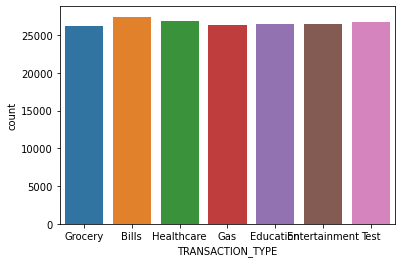

In [24]:
sns.countplot(data=pd_df_cc, x='TRANSACTION_TYPE')

In [25]:
highest_transaction_type = pd_df_cc['TRANSACTION_TYPE'].value_counts().sort_values(ascending=False).index[0]
highest_transaction_count = pd_df_cc['TRANSACTION_TYPE'].value_counts().sort_values(ascending=False)[0]
print("Transaction type with highest count is \"{0}\" with a count of {1}".format(highest_transaction_type, highest_transaction_count))

Transaction type with highest count is "Bills" with a count of 27444


In [26]:
import plotly.express as px

In [27]:
px.histogram(pd_df, x='TRANSACTION_TYPE')

NameError: name 'pd_df' is not defined

In [ ]:
pd_df_customer.head(1)

In [ ]:
pd_df_customer['CUST_STATE'].value_counts()

In [ ]:
highest_cust_state = pd_df_customer['CUST_STATE'].value_counts().sort_values(ascending=False).index[0]
highest_cust_count = pd_df_customer['CUST_STATE'].value_counts().sort_values(ascending=False)[0]
print("State type with highest customers is \"{0}\" with a count of {1}".format(highest_cust_state, highest_cust_count))

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=pd_df_customer, y='CUST_STATE')
plt.show()

In [ ]:
px.histogram(pd_df_customer, y='CUST_STATE')

In [28]:
spark.stop()